# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [7]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [8]:
emoji.is_emoji("❤️")

True

In [9]:
# change `data_location` to the location of the folder on your machine.
data_location = "M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [10]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = len("".join(tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print("The five most common tokens are: ", Counter(tokens).most_common(5))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [11]:
text = """here is some example text with other example text here in this text""".split()

assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The five most common tokens are:  [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: helps find errors in the code. This is helpful to catch any logical flaws with the program prior to deployment.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [12]:
# Read in the lyrics data

artist_folders = os.listdir(data_location + lyrics_folder)

artist_lyrics_d = dict()

for artist in artist_folders :
    
    artist_lyrics_d[artist] = dict()
    
    artist_files = os.listdir(data_location + lyrics_folder + artist)
    
    for f_name in artist_files:
        
        # I stored the lyrics data in a dictionary with 
        # two dimensions of keys: artist and song. 
        # The value was the file contents. 
        with open(data_location + lyrics_folder + artist + "/" + f_name) as infile : 
            
            file_contents = infile.read()
            artist_lyrics_d[artist][f_name] = file_contents



In [13]:
# Read in the twitter data

twitter_files = os.listdir(data_location + twitter_folder)

# we need this part in order to skip the ".DS_Store" file
twitter_files = [f for f in twitter_files if f != ".DS_Store"]

# we need this part because only need the files that contain follower data
twitter_files = [f for f in twitter_files if "data" in f]

artist_twitter_d = dict()

for file in twitter_files:
    
    # print(data_location + twitter_folder + file)
    
    # extract the artist name from filename
    artist_name = file.split("_")[0]
    
    with open(data_location + twitter_folder + file, 'r', encoding = "utf-8") as infile :
        
        # check the headers
        headers = infile.readline().split("\t")
        
        # print(headers)
        
        descriptions = []
        # locations = set()
        
        for idx, line in enumerate(infile.readlines()) :
            
            line = line.strip("\n").split("\t")
            # print(line)
            
            try : 
                # locations.add(line[3])
                # print(line[6])
                descriptions.append([line[6]])
            except :
                pass
            
    artist_twitter_d[artist_name] = descriptions
    


## Data Cleaning

Now clean and tokenize your data. Remove punctuation characters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [14]:
punctuation = set(punctuation) # speeds up comparison

In [95]:
# create your clean twitter data here
artist_tw_data = dict()

for artist in artist_twitter_d:
    
    artist_tw_data[artist] = dict()
    artist_tw_data[artist]["twitter"] = []

    for desc_list in artist_twitter_d[artist]:

        for desc in desc_list:
            # if there is a twitter description!
            if desc != "":
                # fold to lowercase
                lwr_desc = desc.lower()

                # split on whitespace
                tw_tokens = lwr_desc.split()
                # print(tw_tokens)

                tw_tokens_no_punc = []

                # remove punctuations
                for tw_token in tw_tokens:
                    if tw_token not in punctuation:
                        # print(tw_token)
                        tw_token = tw_token.replace(",","")
                        tw_token = tw_token.replace('"','')
                        tw_token = tw_token.replace('(','')
                        tw_token = tw_token.replace(')','')
                        tw_token = tw_token.replace('[','')
                        tw_token = tw_token.replace('.','')
                        tw_token = tw_token.replace(']','')
                        tw_token = tw_token.replace('?','')
                        tw_tokens_no_punc.append(tw_token)

                tokens_no_sw = [t for t in tw_tokens_no_punc if not t in sw]
                
                artist_tw_data[artist]["twitter"].extend(tokens_no_sw)


In [102]:
# create your clean lyrics data here
# Now clean and tokenize your data.

artist_data = dict()

for artist in artist_lyrics_d:
    
    artist_data[artist] = dict()
    artist_data[artist]["lyrics"] = []
    
    for song in artist_lyrics_d[artist]:
        
        lyrics_text = artist_lyrics_d[artist][song]
    
        # fold to lowercase
        text_lower = lyrics_text.lower()

        # split on whitespace
        tokens = text_lower.split()

        # remove punctuations
        # punctuation_set = set(punctuation) 

        tokens_no_punc = []

        for token in tokens:
            if token not in punctuation:
                token = token.replace(",","")
                token = token.replace('"','')
                token = token.replace('(','')
                token = token.replace(')','')
                token = token.replace('[','')
                token = token.replace(']','')
                token = token.replace('?','')
                token = token.replace('...','')
                tokens_no_punc.append(token)

        # remove the stopwords

        tokens_no_sw = [token for token in tokens_no_punc if not token in sw]
        
        artist_data[artist]["lyrics"].extend(tokens_no_sw)
        

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [104]:
# calls to descriptive_stats here
descriptive_stats(artist_data["cher"]["lyrics"], verbose=True)
descriptive_stats(artist_tw_data["cher"]["twitter"], verbose=True)
descriptive_stats(artist_data["robyn"]["lyrics"], verbose=True)
descriptive_stats(artist_tw_data["robynkonichiwa"]["twitter"], verbose=True)

There are 34799 tokens in the data.
There are 3880 unique tokens in the data.
There are 170557 characters in the data.
The lexical diversity is 0.111 in the data.
The five most common tokens are:  [('love', 1004), ("i'm", 513), ('know', 482), ('time', 319), ('baby', 318)]
There are 15801243 tokens in the data.
There are 1740687 unique tokens in the data.
There are 95600077 characters in the data.
The lexical diversity is 0.110 in the data.
The five most common tokens are:  [('love', 210822), ('life', 113146), ("i'm", 100516), ('music', 84111), ('de', 72890)]
There are 14724 tokens in the data.
There are 2213 unique tokens in the data.
There are 72916 characters in the data.
The lexical diversity is 0.150 in the data.
The five most common tokens are:  [('know', 308), ("i'm", 298), ('love', 273), ('got', 251), ('like', 232)]
There are 1509524 tokens in the data.
There are 284143 unique tokens in the data.
There are 9403524 characters in the data.
The lexical diversity is 0.188 in the dat

[1509524, 284143, 0.188233509371166, 9403524]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we do not remove the stopwords, all 5 top words would stopwords because they are the most often encountered in any of the sentences.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: The lexical diversity as far as song lyrics are: (cher) 0.111 and robynkonichiwa (0.150) shows that robynkonichiwa has slightly more lexical diversity in her songs. But do not have any prior beliefs about them to begin with.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [110]:
def is_emoji(s):
    return(emoji.is_emoji(s))


assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [120]:

for artist in artist_tw_data:

    emoji_list = []

    for tw_tok in artist_tw_data[artist]["twitter"]:

        for char in tw_tok:

            if is_emoji(char):
                # print(char)
                emoji_list.append(char)

    print(f"The 10 most common Emojis for {artist} are: ", Counter(emoji_list).most_common(10))        
        
    

The 10 most common Emojis for cher are:  [('❤', 79223), ('🌈', 47549), ('♥', 33978), ('🏳', 33412), ('✨', 29468), ('💙', 21379), ('🏻', 20930), ('🌊', 20223), ('✌', 16773), ('💜', 16550)]
The 10 most common Emojis for robynkonichiwa are:  [('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [129]:
# Your code here

for artist in artist_tw_data:
    
    hashtag_list = []

    for tw_tok in artist_tw_data[artist]["twitter"]:
        # print(tw_tok)
        if tw_tok.startswith("#"):
            # print(tw_tok)
            hashtag_list.append(tw_tok)
            
    print(f"The 10 most common Hashtags for {artist} are: ", Counter(hashtag_list).most_common(10))  
        

The 10 most common Hashtags for cher are:  [('#resist', 10368), ('#blm', 9507), ('#blacklivesmatter', 7718), ('#theresistance', 3181), ('#fbr', 3114), ('#resistance', 2741), ('#1', 2363), ('#voteblue', 2044), ('#lgbtq', 1546), ('#music', 1428)]
The 10 most common Hashtags for robynkonichiwa are:  [('#blacklivesmatter', 580), ('#blm', 340), ('#music', 286), ('#1', 191), ('#teamfollowback', 124), ('#edm', 107), ('#resist', 80), ('#art', 68), ('#travel', 64), ('#freebritney', 64)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [155]:
# Your code here

for artist in artist_lyrics_d:

    title_list = []

    for filename in artist_lyrics_d[artist].keys():
        # print(filename)

        lyrics = artist_lyrics_d[artist][filename]

        title = lyrics.split("\n")[0]

        title = title.replace('"', '')

        # print(title)
        title_list.extend(title.split())

    print(f"The 5 most common Words in Song Titles for {artist} are: ", Counter(title_list).most_common(5))


The 5 most common Words in Song Titles for cher are:  [('The', 53), ('You', 40), ('Love', 38), ('I', 32), ('To', 28)]
The 5 most common Words in Song Titles for robyn are:  [('Me', 11), ('You', 8), ('The', 8), ('My', 8), ('To', 6)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

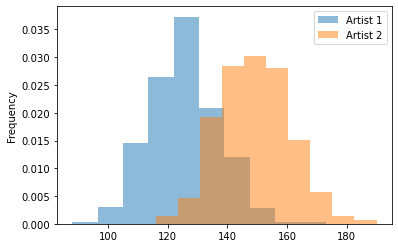

In [191]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: \s indicates 'single whitespace' and the + sign indicated 'one or more items', therefore, s+ indicates 'one or more whitespaces'


In [192]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

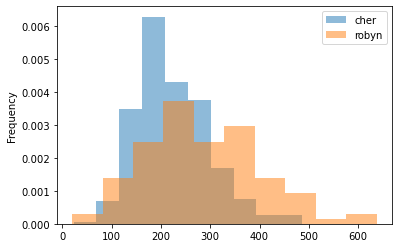

In [194]:
# Your lyric length comparison chart here. 
df_new = pd.DataFrame()

for artist in artist_lyrics_d:
    
    df_temp = pd.DataFrame()

    song_length_list = []

    for filename in artist_lyrics_d[artist]:

            lyrics = artist_lyrics_d[artist][filename]
            # song_length = len(lyrics.split())
            song_length = len(tokenize_lyrics(lyrics))
            song_length_list.append(song_length)
    
    df_temp["length"] = song_length_list
    df_temp["artist"] = artist
    df_new = pd.concat([df_new, df_temp], ignore_index=True)


df_new.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True);
